In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os

print("Current Path: ", os.getcwd())
os.chdir('/content/drive/MyDrive/Colab Notebooks/VCC_project/VNE_Input-main/')
print("Current Path: ", os.getcwd())

Current Path:  /content
Current Path:  /content/drive/MyDrive/Colab Notebooks/VCC_project/VNE_Input-main


In [4]:
import sys
import copy
import graph
import pickle
import networkx as nx
from vne import create_vne
import matplotlib.pyplot as plt

In [4]:
# !unzip alib

In [5]:
!pip install gurobipy
!pip install Unidecode

     |████████████████████████████████| 11.5 MB 26.1 MB/s 
     |████████████████████████████████| 235 kB 26.7 MB/s 


In [17]:
# Graph Extraction
class Extract:
    def get_graphs(self):
        # os.chdir('/content/drive/MyDrive/Colab Notebooks/VCC_project/VNE_Input-main/')
        current = os.getcwd()
        print(current)
        current = os.path.join(
            os.path.dirname(current),
            "VNE_Input-main",
            "P3_ALIB_MASTER",
            "input",
            "senario_RedBestel.pickle",
        )
        with open(current, "rb") as f:
            data = pickle.load(f)
        para = graph.Parameters(10000, 500000, 10000, 500000, 0, 100, 0, 100, 1,
                                1) 
        substrate = graph.Graph(
            len(data.scenario_list[0].substrate.nodes),
            data.scenario_list[0].substrate.edges,
            para,
        )
        min_nodes=4
        max_nodes=6
        no_requests=4
        vne_list = create_vne(min_nodes, max_nodes, no_requests)
        return substrate, vne_list


In [18]:
x = Extract()
# substrate, vne_list = x.get_graphs(req_no = 15)    # USE THIS STATEMENT FOR AUTOMATION & comment line no 42
substrate, vne_list = x.get_graphs()
output = {"substrate": substrate, "vne_list": vne_list}
pickle_file = open("input.pickle", "wb")
pickle.dump(output, pickle_file)

/content/drive/MyDrive/Colab Notebooks/VCC_project/VNE_Input-main


In [19]:
print("Substrate Network")
print("Nodes: ", substrate.nodes)
print("Nodes & their Weights: ", substrate.node_weights)
print("Edges: ", len(substrate.edges))
print("Edge & their Weights: ", substrate.edge_weights)
print("Adj List: ", substrate.neighbours)

Substrate Network
Nodes:  84
Nodes & their Weights:  {0: 33008, 1: 480194, 2: 205199, 3: 180726, 4: 330777, 5: 11716, 6: 254983, 7: 290184, 8: 165570, 9: 184153, 10: 259024, 11: 401183, 12: 16910, 13: 367278, 14: 17515, 15: 449262, 16: 337707, 17: 146341, 18: 122944, 19: 267195, 20: 205586, 21: 344255, 22: 231649, 23: 381950, 24: 340841, 25: 299349, 26: 383872, 27: 264878, 28: 185099, 29: 329745, 30: 218093, 31: 57195, 32: 496682, 33: 251638, 34: 51175, 35: 268705, 36: 315294, 37: 466328, 38: 94680, 39: 266343, 40: 458970, 41: 239475, 42: 449043, 43: 73127, 44: 263031, 45: 237860, 46: 400951, 47: 96493, 48: 339032, 49: 111657, 50: 136453, 51: 116144, 52: 65913, 53: 409817, 54: 12920, 55: 361139, 56: 136609, 57: 466075, 58: 411418, 59: 79966, 60: 457033, 61: 106081, 62: 417740, 63: 97273, 64: 193753, 65: 325831, 66: 21467, 67: 102311, 68: 295447, 69: 138016, 70: 362625, 71: 71563, 72: 315207, 73: 26290, 74: 477627, 75: 67341, 76: 211653, 77: 142119, 78: 296232, 79: 188826, 80: 284650, 8

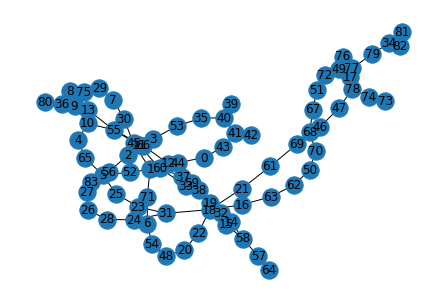

In [20]:
G_sub = nx.Graph()

for u,v in substrate.edges:
  G_sub.add_edge(u, v)

nx.draw(G_sub, with_labels = True)
# plt.savefig("substrate.png")

In [21]:
# Demo_Substrate Graph
nodes = 8
para = graph.Parameters(10, 50, 10, 30, 0, 100, 0, 100, 1, 1)
# edges = [('0', '1'), ('1', '0'), ('0', '4'), ('4', '0'), ('1', '2'), ('2', '1'),
        #  ('4', '1'), ('1', '4'), ('2', '3'), ('3', '2'), ('3', '4'), ('4', '3')]
edges = []
for i in range(nodes):
  for j in range(nodes):
    if i != j:
      edges.append((str(i), str(j)))
demo_substrate = graph.Graph(nodes, edges, para)

In [22]:
print("demo_substrate Network")
# print("Nodes: ", demo_substrate.nodes)
print("Nodes & their Weights: ", demo_substrate.node_weights)
# print("Edges: ", demo_substrate.edges)
print("Edge & their Weights: ", demo_substrate.edge_weights)
print("Adj List: ", demo_substrate.neighbours)

demo_substrate Network
Nodes & their Weights:  {0: 28, 1: 22, 2: 24, 3: 27, 4: 27, 5: 14, 6: 20, 7: 24}
Edge & their Weights:  {('0', '1'): 12, ('1', '0'): 12, ('0', '2'): 35, ('2', '0'): 35, ('0', '3'): 11, ('3', '0'): 11, ('0', '4'): 14, ('4', '0'): 14, ('0', '5'): 17, ('5', '0'): 17, ('0', '6'): 48, ('6', '0'): 48, ('0', '7'): 43, ('7', '0'): 43, ('1', '2'): 41, ('2', '1'): 41, ('1', '3'): 39, ('3', '1'): 39, ('1', '4'): 20, ('4', '1'): 20, ('1', '5'): 12, ('5', '1'): 12, ('1', '6'): 39, ('6', '1'): 39, ('1', '7'): 29, ('7', '1'): 29, ('2', '3'): 38, ('3', '2'): 38, ('2', '4'): 44, ('4', '2'): 44, ('2', '5'): 23, ('5', '2'): 23, ('2', '6'): 33, ('6', '2'): 33, ('2', '7'): 18, ('7', '2'): 18, ('3', '4'): 37, ('4', '3'): 37, ('3', '5'): 35, ('5', '3'): 35, ('3', '6'): 15, ('6', '3'): 15, ('3', '7'): 35, ('7', '3'): 35, ('4', '5'): 39, ('5', '4'): 39, ('4', '6'): 50, ('6', '4'): 50, ('4', '7'): 20, ('7', '4'): 20, ('5', '6'): 16, ('6', '5'): 16, ('5', '7'): 43, ('7', '5'): 43, ('6', '7

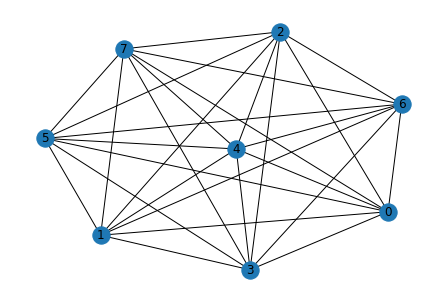

In [23]:
G_demo_sub = nx.Graph()

for u,v in demo_substrate.edges:
  G_demo_sub.add_edge(u, v)

nx.draw(G_demo_sub, with_labels = True)
plt.savefig("demo_substrate.png")

In [24]:
for i in range(len(vne_list)):
  vne = vne_list[i]
  print("Request ", i+1)
  print("--------------------------------------------------------------")
  print("VNE Request")
  # print("Nodes: ", vne.nodes)
  print("Nodes & their Weights: ", vne.node_weights)
  # print("Edges: ", vne.edges)
  print("Edge & their Weights: ", vne.edge_weights)
  print("Adj List: ", vne.neighbours)
  print()
  

Request  1
--------------------------------------------------------------
VNE Request
Nodes & their Weights:  {0: 13, 1: 11, 2: 7, 3: 8, 4: 5, 5: 6}
Edge & their Weights:  {('0', '3'): 6, ('3', '0'): 6, ('2', '0'): 2, ('0', '2'): 2, ('0', '4'): 4, ('4', '0'): 4, ('4', '1'): 7, ('1', '4'): 7, ('2', '5'): 6, ('5', '2'): 6, ('0', '1'): 5, ('1', '0'): 5}
Adj List:  {0: {'3', '2', '1', '4'}, 1: {'0', '4'}, 2: {'5', '0'}, 3: {'0'}, 4: {'0', '1'}, 5: {'2'}}

Request  2
--------------------------------------------------------------
VNE Request
Nodes & their Weights:  {0: 11, 1: 10, 2: 10, 3: 7, 4: 12, 5: 8}
Edge & their Weights:  {('3', '4'): 1, ('4', '3'): 1, ('4', '5'): 6, ('5', '4'): 6, ('5', '1'): 3, ('1', '5'): 3, ('5', '0'): 10, ('0', '5'): 10, ('2', '3'): 5, ('3', '2'): 5, ('5', '3'): 9, ('3', '5'): 9}
Adj List:  {0: {'5'}, 1: {'5'}, 2: {'3'}, 3: {'5', '2', '4'}, 4: {'5', '3'}, 5: {'0', '1', '3', '4'}}

Request  3
--------------------------------------------------------------
VNE Reques

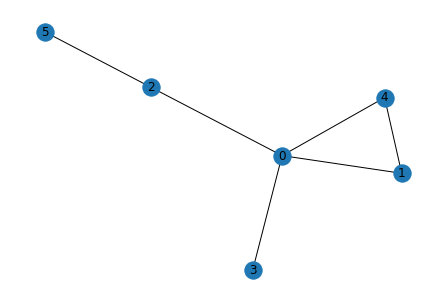

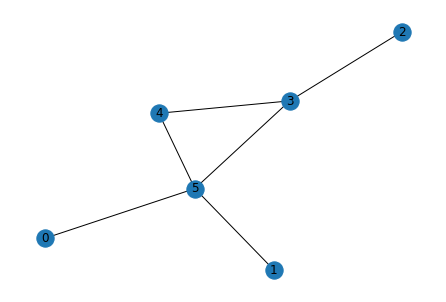

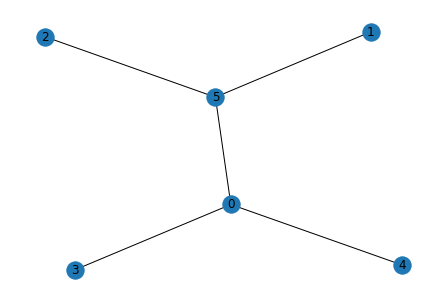

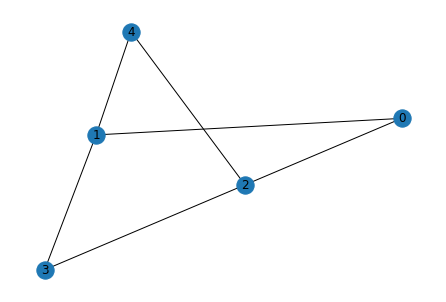

In [25]:
for i in range(len(vne_list)):
  vne = vne_list[i]
  G_vne = nx.Graph()

  for u,v in vne.edges:
    G_vne.add_edge(u, v)
  plt.figure(i+1)
  nx.draw(G_vne, with_labels = True)
  plt.savefig("vne_"+str(i+1)+".png")
  # plt.clf()

In [26]:
trishul = [[0, 0]]*demo_substrate.nodes

def dino_sum(s_nd, s_nd_cap, vne):
  cnt = 0
  temp_cap = s_nd_cap
  for v,c in vne.node_weights.items():
    if c < temp_cap:
      cnt += 1
      temp_cap -= c;
  return cnt

def updateTrishul(vne, curr_state_sg, v_nd_id, v_nd_cap):
  global trishul
  for s_nd, s_nd_cap in curr_state_sg.node_weights.items():
    numer = v_nd_cap
    temp = dino_sum(s_nd, s_nd_cap, vne)
    if temp == s_nd_cap:
      tri = sys.maxsize
    else:
      denomer = s_nd_cap - temp
      tri = numer/denomer
    # print(s_nd)
    trishul[s_nd] = [tri, s_nd]

  trishul = sorted(trishul)

In [27]:
VNEmbed_nodes = [-1]*len(vne_list)
VNEmbed_edges = [-1]*len(vne_list)

In [48]:
temp_curr_state_sg = copy.deepcopy(demo_substrate)
curr_state_sg = copy.deepcopy(temp_curr_state_sg)

# for i in range(len(vne_list)):
for i in range(3):
  vne = vne_list[i]

  mappingVtoS = {}
  mappingStoV = {}
  # curr_state_sg = demo_substrate


  # Node Mapping

  flag = False
  sorted_vne = sorted(vne.node_weights.items(), key = lambda kv:(kv[1]), reverse=True)
  for nd_id, nd_cap in sorted_vne:
    updateTrishul(vne, curr_state_sg, nd_id, nd_cap)

    for s_nd_from_tri in trishul:
      s_nd_cap = curr_state_sg.node_weights[s_nd_from_tri[1]]

      if nd_cap <= s_nd_cap and mappingStoV.get(s_nd_from_tri[1]) == None:
        mappingVtoS[str(nd_id)] = str(s_nd_from_tri[1])
        mappingStoV[str(s_nd_from_tri[1])] = str(nd_id)
        curr_state_sg.node_weights[s_nd_from_tri[1]] -= nd_cap
        break 
  
    if mappingVtoS.get(str(nd_id)) == None:
      flag = True
      curr_state_sg = copy.deepcopy(temp_curr_state_sg)
      print("Unable to embed all nodes for VNRequest_", i+1, " VNRequest Discarded")
      # curr_state_sg = temp_curr_state_sg
      break
  if flag:
    continue
  
  if len(mappingVtoS) == vne.nodes:
    print("Node Mapping for VNRequest_", i+1, " is completed, Waiting for Link Mapping")
    # print(mappingVtoS)
    # print(mappingStoV)
  else:
    print("Unable to embed all nodes for VNRequest_", i+1, " VNRequest Discarded")
    curr_state_sg = copy.deepcopy(temp_curr_state_sg)
    continue

  print(mappingVtoS)


  # Link Mapping

  link_map_VtoS = {}
  for u,v in vne.edges:
    mapped_s_nd_u = mappingVtoS[u]
    mapped_s_nd_v = mappingVtoS[v]
    demand_uv = vne.edge_weights[(u, v)]
    all_path_uv = curr_state_sg.printAllPaths(mapped_s_nd_u, mapped_s_nd_v, demand_uv)
    all_path_uv.sort(key = len)
    if len(all_path_uv) == 0:
      curr_state_sg = copy.deepcopy(temp_curr_state_sg)
      print("Unable to embed all Links for VNRequest_", i+1, " VNRequest Discarded")
      break
    else:
      link_map_VtoS[(u, v)] = all_path_uv[0]
      for ix in range(len(all_path_uv[0])-1):
        ux = all_path_uv[0][ix]
        vx = all_path_uv[0][ix+1]
        curr_state_sg.edge_weights[(ux, vx)] = curr_state_sg.edge_weights[(ux, vx)] - demand_uv
        curr_state_sg.edge_weights[(vx, ux)] = curr_state_sg.edge_weights[(vx, ux)] - demand_uv
    
  if len(link_map_VtoS) == len(vne.edges):
    temp_curr_state_sg = copy.deepcopy(curr_state_sg)
    print("Link Mapping for VNRequest_", i+1, " is completed")
    VNEmbed_nodes[i] = mappingVtoS
    VNEmbed_edges[i] = link_map_VtoS
    # print(link_map_VtoS)
  else:
    curr_state_sg = copy.deepcopy(temp_curr_state_sg)
    print("Unable to embed all links for VNRequest_", i+1, " VNRequest Discarded")
  print("---------------------------------------------------------------------\n")

  


Node Mapping for VNRequest_ 1  is completed, Waiting for Link Mapping
{'0': '0', '1': '3', '3': '4', '2': '2', '5': '7', '4': '1'}
Link Mapping for VNRequest_ 1  is completed
---------------------------------------------------------------------

Node Mapping for VNRequest_ 2  is completed, Waiting for Link Mapping
{'4': '6', '0': '4', '1': '7', '2': '1', '5': '2', '3': '3'}
Link Mapping for VNRequest_ 2  is completed
---------------------------------------------------------------------

Unable to embed all nodes for VNRequest_ 3  VNRequest Discarded


In [49]:
for i in range(len(VNEmbed_nodes)):
  node_map = VNEmbed_nodes[i]
  edge_map = VNEmbed_edges[i]
  print("VNReques_", i+1)
  print(node_map)
  print(edge_map)
  print("----------------------------------------------\n")

VNReques_ 1
{'0': '0', '1': '3', '3': '4', '2': '2', '5': '7', '4': '1'}
{('0', '3'): ['0', '4'], ('2', '0'): ['2', '0'], ('0', '4'): ['0', '1'], ('4', '1'): ['1', '3'], ('2', '5'): ['2', '7'], ('5', '2'): ['7', '2'], ('3', '0'): ['4', '0'], ('0', '1'): ['0', '3'], ('1', '4'): ['3', '1'], ('4', '0'): ['1', '0'], ('0', '2'): ['0', '2'], ('1', '0'): ['3', '0']}
----------------------------------------------

VNReques_ 2
{'4': '6', '0': '4', '1': '7', '2': '1', '5': '2', '3': '3'}
{('3', '4'): ['3', '6'], ('4', '5'): ['6', '2'], ('5', '1'): ['2', '7'], ('5', '0'): ['2', '4'], ('1', '5'): ['7', '2'], ('2', '3'): ['1', '3'], ('5', '4'): ['2', '6'], ('0', '5'): ['4', '2'], ('4', '3'): ['6', '3'], ('5', '3'): ['2', '3'], ('3', '5'): ['3', '2'], ('3', '2'): ['3', '1']}
----------------------------------------------

VNReques_ 3
-1
-1
----------------------------------------------

VNReques_ 4
-1
-1
----------------------------------------------



In [50]:
# Difference betwenn current state and orignal graph

print("Inital state of physical Network")
print("Nodes: ", demo_substrate.nodes)
print("Nodes & their Weights: ", demo_substrate.node_weights)
print("Edges: ", len(demo_substrate.edges))
print("Edge & their Weights: ", demo_substrate.edge_weights)
print("Adj List: ", demo_substrate.neighbours)

print()
print()
print("After mapping current state of physical Network")
print("Nodes: ", temp_curr_state_sg.nodes)
print("Nodes & their Weights: ", temp_curr_state_sg.node_weights)
print("Edges: ", len(temp_curr_state_sg.edges))
print("Edge & their Weights: ", temp_curr_state_sg.edge_weights)
print("Adj List: ", temp_curr_state_sg.neighbours)

Inital state of physical Network
Nodes:  8
Nodes & their Weights:  {0: 28, 1: 22, 2: 24, 3: 27, 4: 27, 5: 14, 6: 20, 7: 24}
Edges:  56
Edge & their Weights:  {('0', '1'): 12, ('1', '0'): 12, ('0', '2'): 35, ('2', '0'): 35, ('0', '3'): 11, ('3', '0'): 11, ('0', '4'): 14, ('4', '0'): 14, ('0', '5'): 17, ('5', '0'): 17, ('0', '6'): 48, ('6', '0'): 48, ('0', '7'): 43, ('7', '0'): 43, ('1', '2'): 41, ('2', '1'): 41, ('1', '3'): 39, ('3', '1'): 39, ('1', '4'): 20, ('4', '1'): 20, ('1', '5'): 12, ('5', '1'): 12, ('1', '6'): 39, ('6', '1'): 39, ('1', '7'): 29, ('7', '1'): 29, ('2', '3'): 38, ('3', '2'): 38, ('2', '4'): 44, ('4', '2'): 44, ('2', '5'): 23, ('5', '2'): 23, ('2', '6'): 33, ('6', '2'): 33, ('2', '7'): 18, ('7', '2'): 18, ('3', '4'): 37, ('4', '3'): 37, ('3', '5'): 35, ('5', '3'): 35, ('3', '6'): 15, ('6', '3'): 15, ('3', '7'): 35, ('7', '3'): 35, ('4', '5'): 39, ('5', '4'): 39, ('4', '6'): 50, ('6', '4'): 50, ('4', '7'): 20, ('7', '4'): 20, ('5', '6'): 16, ('6', '5'): 16, ('5', '7'